# LAB 9 - KERAS

**Student Name:** Tran Thi Hong Phuong</br>
**Student ID:** s3623386

# Dataset

Let's get started by **importing the libraries** we'll need: scikit-learn, Keras and some plotting features.

In [1]:
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


The data will be the iris dataset, this is built into many machine learning libraries. We will use copy in seaborn because it comes as a labelled dataframe that can be easily visualized, and we're already using seaborn for visualization, so **let's load it from there and look at the first 5 examples.**

In [2]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Our job is to build a classifier that given the two petal and two sepal measurements, can predict the species of an iris. **Let's do a quick visualization before we start model building (always a good idea!).**

C:\Users\Dell\Miniconda3\envs\tensorflow-gpu\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


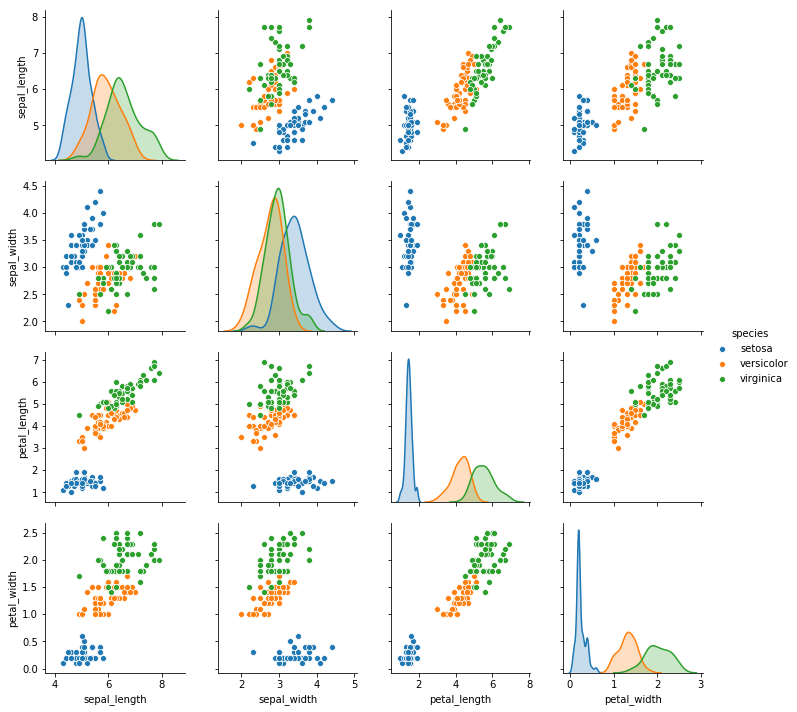

In [3]:
sns.pairplot(iris, hue='species')

**Now we will separate the dependent/target variable which is `species` in our case from other variables.** We'll hold the petal and sepal data in an array X and the species labels in a corresponding array y.

In [4]:
X = iris.values[:, :4]
y = iris.values[:, 4]

As it is standard in supervised machine learning, we'll train with some of the data, and measure the performance of our model with the remainder. This is simple to do by hand, but is also built into scikit-learn as the **`train_test_split()`** function.

In [5]:
from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.7, test_size=0.3,random_state=0)

Here we are splitting whole dataset into 70% for training and 30% for testing. The `random_state` makes sure that the split is always same. Keras requires that the labels be **one-hot-encoded**. This means we need to convert data that looks like

> setosa</br>
versicolor</br>
setosa</br>
virginica</br>
...

to a table that looks likes

> setosa versicolor virginica</br>
1 0 0</br>
0 1 0</br>
1 0 0</br>
0 0 1

**Complete the code snippet below:**

In [6]:
def one_hot_encode_object_array(arr):
    # One hot encode a numpy array of objects (e.g. strings)
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

In [7]:
train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

So far we have done data preprocessing. From this point, we are going to make the actual neural network model and train and test it.

In our case, we'll build an extremely simple network. Two of the choices are made for us by the data. We have four features and three classes, so the input layer must have four units, and the output layer must have three units. We only have to define the hidden layers. **We're only going to have one hidden layer for this project, and we'll give it 16 nodes/neurons/units. We're going to define our model in the most common way i.e a sequential stack of layers.**

In [8]:
# Initialise the model as a sequential model
model = Sequential()

# Define the size of input layer (input_shape=(4,))
# and the size and activation of the hidden layer
model.add(Dense(16, input_shape=(4,), activation='relu'))

# Define the size and activation function of the output layer
model.add(Dense(3, activation='softmax'))

**QUESTION: what is a sequential model?**

> *ANSWER:* Sequential model is a number of layers that are stacked one after another.

Finally, we **specify the optimization strategy and the loss function to optimize**. We also instruct the model to **calculate accuracy** as it works.

In [9]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

There are more than one optimizers available but for now, we will use “adam”. You will work with other optimizers in the experimental section of this tutorial. Here, we have used `categorical_crossentropy` because there are more than two categories in the output variable. Now we've defined the structure of the model and compiled it. Below is the visualization of this model.

If you would like to visualize your other models, look for ANN Visualizer section in the optional part of this tutorial.
The last step is to **train the model on data and find accuracy on test data**. To do that, run this command

In [10]:
history = model.fit(train_X, train_y_ohe, epochs=100)

Epoch 1/100
105/105 [==============================] - 5s 52ms/step - loss: 2.4947 - acc: 0.3714
Epoch 2/100
105/105 [==============================] - 0s 199us/step - loss: 2.3753 - acc: 0.3714
Epoch 3/100
105/105 [==============================] - 0s 199us/step - loss: 2.2573 - acc: 0.3714
Epoch 4/100
105/105 [==============================] - 0s 199us/step - loss: 2.1381 - acc: 0.3714
Epoch 5/100
105/105 [==============================] - 0s 218us/step - loss: 2.0226 - acc: 0.3714
Epoch 6/100
105/105 [==============================] - 0s 218us/step - loss: 1.9145 - acc: 0.3714
Epoch 7/100
105/105 [==============================] - 0s 199us/step - loss: 1.8178 - acc: 0.3714
Epoch 8/100
105/105 [==============================] - 0s 199us/step - loss: 1.7247 - acc: 0.3714
Epoch 9/100
105/105 [==============================] - 0s 190us/step - loss: 1.6359 - acc: 0.3714
Epoch 10/100
105/105 [==============================] - 0s 190us/step - loss: 1.5655 - acc: 0.3714
Epoch 11/100
105/105

## Optional - ANN Visualizer

**Install ANN visualizer and graphviz using the following command on the terminal in the same conda environment**

> `pip install ann_visualizer`</br>
`conda install python-graphviz`

then use this code to visualize the model

In [11]:
from ann_visualizer.visualize import ann_viz
ann_viz(model, title="My first neural network")

You should be able to see the progress in the console. It will be fast as the dataset is very small. In every epoch, all the rows in training data will get introduced to the model and weights will get adjusted accordingly.

Now let us see how good the model is, by **testing on test data using this command**

In [12]:
scores = model.evaluate(test_X, test_y_ohe, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 8.89%
MLP Accuracy on test set: 91.11%


Congratulations!! you have built, trained and tested your first MLP model using keras.

# The MNIST Handwritten Digits dataset

Now we are going to use the MNIST digits dataset for further understanding of MLP and Keras. The dataset is available in zipped format with "MNIST" name on Canvas.

Download a copy of it on your local machine and unzip it. After unzip, navigate to the folder and start jupyter notebook from there. If you already have an instance of notebook running then you can change to that folder using “tree” page. Make sure the working directory should be “MNIST”, which is the top directory of the folder provided to you.

Create a new Python 3 notebook and start with **importing following packages.**

In [13]:
import os, skimage.io, matplotlib.pyplot as plt, numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

In the last problem, we imported the dataset directly from the keras package but for this exercise, we will load the dataset from the disk. There is a total of 70K images, so reading data will take a while. **The data will be in “List format”, we need to convert that into numpy arrays.** You can do it by running the following code.

In [14]:
def load_data(data_directory):
    directories = [d for d in os.listdir(data_directory) if os.path.isdir(os.path.join(data_directory, d))]
    labels = []
    images = []
    for d in directories:
        label_directory = os.path.join(data_directory, d)
        
        file_names = [os.path.join(label_directory, f) for f in os.listdir(label_directory)]
        for f in file_names:
            images.append(skimage.io.imread(f))
            labels.append(int(d))
            
    return images, labels

In [15]:
train_data_path = os.path.join(os.getcwd(), "data", "training")
test_data_path = os.path.join(os.getcwd(), "data", "testing")
images, labels = load_data(train_data_path)
test_images,test_labels = load_data(test_data_path)
images = np.asarray(images)
test_images = np.asarray(test_images)
labels = np.asarray(labels)
test_labels = np.asarray(test_labels)

As you can see there are two splits already, one of those splits is test images and labels which will be used to test the model later. **The other split is images and labels data, retrieved from training folder, that will be further split into a training and a validation set using `train_test split()` function from sklearn library.** Validation data will be helping us to tweak hyperparameters of the model to avoid overfitting.

In [16]:
train_images, validation_images, train_labels, validation_labels = train_test_split(images, labels, train_size=0.8, test_size=0.2,random_state=0)

Let's check the shape of each array and it should look like as below

In [17]:
print(train_images.shape, train_labels.shape, validation_images.shape, validation_labels.shape, test_images.shape, test_labels.shape)

(48000, 28, 28) (48000,) (12000, 28, 28) (12000,) (10000, 28, 28) (10000,)


**We are gonna visualize some pictures to get some insights.**

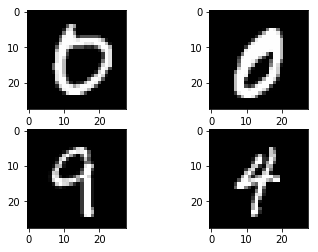

In [18]:
# plot 4 images as grayscale
plt.subplot(221)
plt.imshow(train_images[0], cmap=plt.get_cmap('gray'))
plt.subplot(222)
plt.imshow(train_images[1], cmap=plt.get_cmap('gray'))
plt.subplot(223)
plt.imshow(train_images[2], cmap=plt.get_cmap('gray'))
plt.subplot(224)
plt.imshow(train_images[3], cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

As we know that images are 2D arrays, which need to **flatten before getting fed into the network. MNIST images are of 28x28 which will be converted into a 1D array of 784**, that will also be the number of input nodes of the network.

In [19]:
num_pixels = train_images.shape[1] * train_images.shape[2]

train_images = train_images.reshape(train_images.shape[0], num_pixels).astype('float32')
validation_images = validation_images.reshape(validation_images.shape[0], num_pixels).astype('float32')
test_images = test_images.reshape(test_images.shape[0], num_pixels).astype('float32')

Usually, each pixel varies from 0-255, but it's highly recommended to **normalize them in range of 0-1 to speed up the process**. This mechanism called **Normalization** and can be done using this (complete the code below):

In [20]:
train_images = train_images / 255.
validation_images = validation_images / 255.
test_images = test_images / 255.

Right now, the labels are an array of repetitive numbers, with each number represents each category, which needs to convert into factors. In the last example, we converted string labels into number and then into factor. In here, we directly **convert from number category labels to factor** using this:

In [21]:
train_labels = np_utils.to_categorical(train_labels)
validation_labels = np_utils.to_categorical(validation_labels)
test_labels = np_utils.to_categorical(test_labels)

num_classes = train_labels.shape[1]

**Let's build a simple model with just one hidden layer and 350 nodes in it. And compile it.**

In [22]:
model = Sequential()
model.add(Dense(350, input_dim=num_pixels, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

**Train the model and visualize training & validation accuracy from the training process saved into history variable.**

In [23]:
history = model.fit(train_images, train_labels, validation_data=(validation_images, validation_labels), epochs=5)

training_accuracy = history.history['acc']
validation_accuracy = history.history['val_acc']
training_error = history.history['loss']
validation_error = history.history['val_loss']

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 8s 160us/step - loss: 0.2370 - acc: 0.9311 - val_loss: 0.1153 - val_acc: 0.9678
Epoch 2/5
48000/48000 [==============================] - 7s 142us/step - loss: 0.0941 - acc: 0.9710 - val_loss: 0.0852 - val_acc: 0.9754
Epoch 3/5
48000/48000 [==============================] - 7s 143us/step - loss: 0.0616 - acc: 0.9808 - val_loss: 0.0846 - val_acc: 0.9743
Epoch 4/5
48000/48000 [==============================] - 7s 142us/step - loss: 0.0434 - acc: 0.9867 - val_loss: 0.0868 - val_acc: 0.9750
Epoch 5/5
48000/48000 [==============================] - 7s 142us/step - loss: 0.0308 - acc: 0.9904 - val_loss: 0.0730 - val_acc: 0.9790


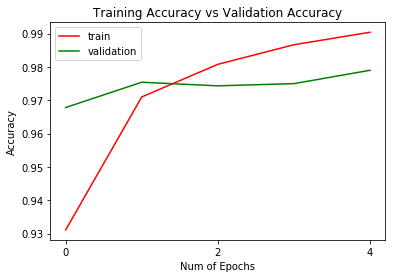

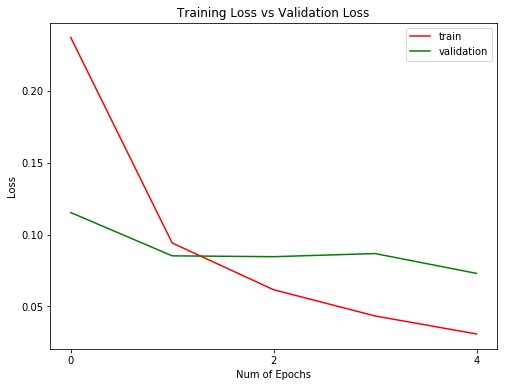

In [24]:
plt.figure(0)
plt.plot(training_accuracy,'r')
plt.plot(validation_accuracy,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Accuracy")
plt.title("Training Accuracy vs Validation Accuracy")
plt.legend(['train','validation'])

plt.figure(1)
plt.plot(training_error,'r')
plt.plot(validation_error,'g')
plt.xticks(np.arange(0, len(training_accuracy), 2.0))
plt.rcParams['figure.figsize'] = (8, 6)
plt.xlabel("Num of Epochs")
plt.ylabel("Loss")
plt.title("Training Loss vs Validation Loss")
plt.legend(['train','validation'])

plt.show()

Note: training accuracy is the accuracy achieved by the model at the last epoch of training

In the graph, if you see training accuracy significantly higher than validation accuracy at any point then it can be potential overfitting. You can avoid it by changing hidden layers, nodes in it or epochs, etc, that is a part of experimentations.

So, now we are gonna **test our trained mode on a test set of 10K images.**

In [25]:
scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

MLP Error on test set: 2.02%
MLP Accuracy on test set: 97.98%


By now, you must have tweaked the hyperparameters and have a better model. Let's see how well does it work with **10 fold cross-validation**. The following code will perform the same and test the model again on the test set.

In [26]:
from sklearn.model_selection import StratifiedKFold

images = images.reshape(images.shape[0], num_pixels).astype('float32')
images = images / 255

temp_labels = labels
labels = np_utils.to_categorical(labels)

kfold = StratifiedKFold(n_splits=10, shuffle=True)

cv_acc = []
cv_error = []
for train, test in kfold.split(images, temp_labels):
    # create model
    model = Sequential()
    model.add(Dense(350, input_dim=num_pixels, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam',
    metrics=['accuracy'])
    # Fit the model
    model.fit(images[train], labels[train], epochs=1, verbose=0)
    # evaluate the model
    scores = model.evaluate(images[test], labels[test], verbose=0)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    cv_acc.append(scores[1] * 100)
    cv_error.append(100-scores[1] * 100)
    
print("Cross Validation Accuracy %.2f%% (+/- %.2f%%)" % (np.mean(cv_acc), np.std(cv_acc)))
print("Cross Validation Error %.2f%% (+/- %.2f%%)" % (np.mean(cv_error), np.std(cv_error)))

scores = model.evaluate(test_images, test_labels, verbose=0)
print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

acc: 96.82%
acc: 95.74%
acc: 96.35%
acc: 96.20%
acc: 96.22%
acc: 96.45%
acc: 96.37%
acc: 96.57%
acc: 96.21%
acc: 96.13%
Cross Validation Accuracy 96.30% (+/- 0.27%)
Cross Validation Error 3.70% (+/- 0.27%)
MLP Error on test set: 3.32%
MLP Accuracy on test set: 96.68%


Finally, the model is ready to use. **So, let's predict classes of some random images using this code**

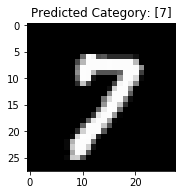

In [27]:
import random

image_index = random.randint(0,test_images.shape[0])
random_image = test_images[image_index]
random_label = model.predict(random_image.reshape(1,random_image.shape[0])).argmax(axis=-1)

plt.subplot(221)
plt.imshow(random_image.reshape(28,28), cmap=plt.get_cmap('gray'))
plt.title("Predicted Category: " + str(random_label))
plt.show()

The next section is really important as it will guide you through some experimentations with the same model.

# Experimentation

Observe the effect on accuracy by try and changing the following parameters. **Perform some experiments with respect to the following considerations and note down your observations**. This will be your lab exercise for this week. 

In [28]:
def run_model(test_size=0.2, random_state=0, n_nodes=350, n_layers=1, n_epochs=5, optimiser='adam'):
    X_train, X_val, Y_train, Y_val = train_test_split(images, labels, test_size=test_size, random_state=random_state)

    model = Sequential()
    model.add(Dense(n_nodes, input_dim=num_pixels, activation='relu'))
    
    if n_layers > 1:
        for i in range(n_layers):
            model.add(Dense(350, activation='relu'))
    
    model.add(Dense(num_classes, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimiser, metrics=['accuracy'])

    model.fit(X_train, Y_train, validation_data=(X_val, Y_val), epochs=n_epochs)

    scores = model.evaluate(test_images, test_labels, verbose=0)
    print("MLP Error on test set: %.2f%%" % (100-scores[1]*100))
    print("MLP Accuracy on test set: %.2f%%" % (scores[1]*100))

## A. Split percentage between training and test set

### More training images, less validation images

In [29]:
run_model(test_size=0.1)

Train on 54000 samples, validate on 6000 samples
Epoch 1/5
54000/54000 [==============================] - 9s 166us/step - loss: 0.2221 - acc: 0.9361 - val_loss: 0.1105 - val_acc: 0.9700
Epoch 2/5
54000/54000 [==============================] - 8s 146us/step - loss: 0.0919 - acc: 0.9721 - val_loss: 0.0999 - val_acc: 0.9723
Epoch 3/5
54000/54000 [==============================] - 8s 144us/step - loss: 0.0596 - acc: 0.9815 - val_loss: 0.0891 - val_acc: 0.9737
Epoch 4/5
54000/54000 [==============================] - 8s 143us/step - loss: 0.0423 - acc: 0.9868 - val_loss: 0.0742 - val_acc: 0.9772
Epoch 5/5
54000/54000 [==============================] - 8s 143us/step - loss: 0.0304 - acc: 0.9906 - val_loss: 0.0751 - val_acc: 0.9792
MLP Error on test set: 1.95%
MLP Accuracy on test set: 98.05%


> *ANSWER:* Reducing validation size to have more training images slightly improve accuracy (98.05% vs 97.98%)

### Less training images, more validation images

In [30]:
run_model(test_size=0.3)

Train on 42000 samples, validate on 18000 samples
Epoch 1/5
42000/42000 [==============================] - 7s 175us/step - loss: 0.2567 - acc: 0.9260 - val_loss: 0.1396 - val_acc: 0.9606
Epoch 2/5
42000/42000 [==============================] - 7s 159us/step - loss: 0.1053 - acc: 0.9680 - val_loss: 0.1131 - val_acc: 0.9666
Epoch 3/5
42000/42000 [==============================] - 7s 159us/step - loss: 0.0669 - acc: 0.9793 - val_loss: 0.0879 - val_acc: 0.9738
Epoch 4/5
42000/42000 [==============================] - 7s 158us/step - loss: 0.0474 - acc: 0.9856 - val_loss: 0.0871 - val_acc: 0.9754
Epoch 5/5
42000/42000 [==============================] - 7s 159us/step - loss: 0.0335 - acc: 0.9891 - val_loss: 0.0848 - val_acc: 0.9772
MLP Error on test set: 2.41%
MLP Accuracy on test set: 97.59%


> *ANSWER:* Increasing validation slightly decreases accuracy (97.59% vs 97.98%)

## B. Random state

In [31]:
run_model(random_state=19)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 8s 165us/step - loss: 0.2379 - acc: 0.9302 - val_loss: 0.1365 - val_acc: 0.9609
Epoch 2/5
48000/48000 [==============================] - 7s 156us/step - loss: 0.0945 - acc: 0.9714 - val_loss: 0.0922 - val_acc: 0.9706
Epoch 3/5
48000/48000 [==============================] - 7s 151us/step - loss: 0.0610 - acc: 0.9807 - val_loss: 0.0917 - val_acc: 0.9716
Epoch 4/5
48000/48000 [==============================] - 7s 151us/step - loss: 0.0426 - acc: 0.9868 - val_loss: 0.0795 - val_acc: 0.9761
Epoch 5/5
48000/48000 [==============================] - 7s 151us/step - loss: 0.0314 - acc: 0.9897 - val_loss: 0.0783 - val_acc: 0.9789
MLP Error on test set: 2.14%
MLP Accuracy on test set: 97.86%


> *ANSWER:* Changing `random_state` parameter does not have much effect on accuracy (97.86% vs 97.98%)

## C. Number of nodes in a hidden layer

### More nodes

In [32]:
run_model(n_nodes=512)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 9s 180us/step - loss: 0.2231 - acc: 0.9346 - val_loss: 0.1190 - val_acc: 0.9658
Epoch 2/5
48000/48000 [==============================] - 8s 167us/step - loss: 0.0881 - acc: 0.9733 - val_loss: 0.0930 - val_acc: 0.9726
Epoch 3/5
48000/48000 [==============================] - 8s 170us/step - loss: 0.0567 - acc: 0.9821 - val_loss: 0.0828 - val_acc: 0.9776
Epoch 4/5
48000/48000 [==============================] - 8s 167us/step - loss: 0.0391 - acc: 0.9876 - val_loss: 0.0855 - val_acc: 0.9742
Epoch 5/5
48000/48000 [==============================] - 8s 167us/step - loss: 0.0295 - acc: 0.9909 - val_loss: 0.0792 - val_acc: 0.9778
MLP Error on test set: 2.37%
MLP Accuracy on test set: 97.63%


> *ANSWER:* Increasing the number of nodes slightly improves training accuracy but worsens test accuracy -> overfit

### Less nodes

In [33]:
run_model(n_nodes=128)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 154us/step - loss: 0.2842 - acc: 0.9189 - val_loss: 0.1687 - val_acc: 0.9512
Epoch 2/5
48000/48000 [==============================] - 7s 140us/step - loss: 0.1265 - acc: 0.9622 - val_loss: 0.1164 - val_acc: 0.9663
Epoch 3/5
48000/48000 [==============================] - 7s 141us/step - loss: 0.0862 - acc: 0.9747 - val_loss: 0.0904 - val_acc: 0.9743
Epoch 4/5
48000/48000 [==============================] - 7s 139us/step - loss: 0.0645 - acc: 0.9809 - val_loss: 0.0937 - val_acc: 0.9732
Epoch 5/5
48000/48000 [==============================] - 7s 136us/step - loss: 0.0497 - acc: 0.9849 - val_loss: 0.0840 - val_acc: 0.9754
MLP Error on test set: 2.50%
MLP Accuracy on test set: 97.50%


> *ANSWER:* Decreasing the number of nodes worsens both training accuracy and test accuracy -> underfit

## D. Add more hidden layers

In [34]:
run_model(n_layers=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 10s 218us/step - loss: 0.2150 - acc: 0.9350 - val_loss: 0.1132 - val_acc: 0.9665
Epoch 2/5
48000/48000 [==============================] - 10s 203us/step - loss: 0.0959 - acc: 0.9701 - val_loss: 0.1238 - val_acc: 0.9633
Epoch 3/5
48000/48000 [==============================] - 10s 201us/step - loss: 0.0702 - acc: 0.9782 - val_loss: 0.0910 - val_acc: 0.9732
Epoch 4/5
48000/48000 [==============================] - 10s 203us/step - loss: 0.0559 - acc: 0.9826 - val_loss: 0.0935 - val_acc: 0.9752
Epoch 5/5
48000/48000 [==============================] - 10s 202us/step - loss: 0.0441 - acc: 0.9860 - val_loss: 0.0921 - val_acc: 0.9763
MLP Error on test set: 2.57%
MLP Accuracy on test set: 97.43%


In [35]:
run_model(n_layers=3)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 12s 243us/step - loss: 0.2324 - acc: 0.9296 - val_loss: 0.1439 - val_acc: 0.9575
Epoch 2/5
48000/48000 [==============================] - 11s 226us/step - loss: 0.1124 - acc: 0.9675 - val_loss: 0.1335 - val_acc: 0.9616
Epoch 3/5
48000/48000 [==============================] - 11s 227us/step - loss: 0.0815 - acc: 0.9762 - val_loss: 0.1189 - val_acc: 0.9686
Epoch 4/5
48000/48000 [==============================] - 11s 232us/step - loss: 0.0643 - acc: 0.9814 - val_loss: 0.0905 - val_acc: 0.9763
Epoch 5/5
48000/48000 [==============================] - 11s 230us/step - loss: 0.0537 - acc: 0.9845 - val_loss: 0.1080 - val_acc: 0.9719
MLP Error on test set: 2.83%
MLP Accuracy on test set: 97.17%


In [36]:
run_model(n_layers=4)

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 13s 268us/step - loss: 0.2465 - acc: 0.9264 - val_loss: 0.1296 - val_acc: 0.9652
Epoch 2/5
48000/48000 [==============================] - 12s 251us/step - loss: 0.1230 - acc: 0.9649 - val_loss: 0.1268 - val_acc: 0.9648
Epoch 3/5
48000/48000 [==============================] - 12s 253us/step - loss: 0.0903 - acc: 0.9739 - val_loss: 0.1212 - val_acc: 0.9683
Epoch 4/5
48000/48000 [==============================] - 12s 256us/step - loss: 0.0710 - acc: 0.9802 - val_loss: 0.1103 - val_acc: 0.9708
Epoch 5/5
48000/48000 [==============================] - 12s 255us/step - loss: 0.0624 - acc: 0.9827 - val_loss: 0.1356 - val_acc: 0.9675
MLP Error on test set: 3.27%
MLP Accuracy on test set: 96.73%


> *ANSWER:* As the number of layers increases, training time also increases, but accuracy tends to decreases

## E. Number of epochs

In [37]:
run_model(n_epochs=10)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 9s 181us/step - loss: 0.2353 - acc: 0.9324 - val_loss: 0.1326 - val_acc: 0.9614
Epoch 2/10
48000/48000 [==============================] - 8s 166us/step - loss: 0.0975 - acc: 0.9700 - val_loss: 0.0922 - val_acc: 0.9731
Epoch 3/10
48000/48000 [==============================] - 8s 173us/step - loss: 0.0638 - acc: 0.9798 - val_loss: 0.0859 - val_acc: 0.9751
Epoch 4/10
48000/48000 [==============================] - 9s 189us/step - loss: 0.0450 - acc: 0.9855 - val_loss: 0.0727 - val_acc: 0.9785
Epoch 5/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.0322 - acc: 0.9900 - val_loss: 0.0783 - val_acc: 0.9776
Epoch 6/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.0237 - acc: 0.9926 - val_loss: 0.0769 - val_acc: 0.9790
Epoch 7/10
48000/48000 [==============================] - 8s 160us/step - loss: 0.0198 - acc: 0.9938 - val_loss: 0.0786 - 

> *ANSWER:* Increasing the number of epochs improves training, validation and even test accuracy.

## F. Different optimizers such as SGD, RMSprop

In [38]:
run_model(optimiser='sgd')

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 7s 152us/step - loss: 0.6810 - acc: 0.8365 - val_loss: 0.3886 - val_acc: 0.8942
Epoch 2/5
48000/48000 [==============================] - 7s 137us/step - loss: 0.3476 - acc: 0.9039 - val_loss: 0.3139 - val_acc: 0.9113
Epoch 3/5
48000/48000 [==============================] - 7s 147us/step - loss: 0.2958 - acc: 0.9164 - val_loss: 0.2788 - val_acc: 0.9209
Epoch 4/5
48000/48000 [==============================] - 6s 134us/step - loss: 0.2649 - acc: 0.9259 - val_loss: 0.2561 - val_acc: 0.9277
Epoch 5/5
48000/48000 [==============================] - 6s 135us/step - loss: 0.2422 - acc: 0.9322 - val_loss: 0.2373 - val_acc: 0.9337
MLP Error on test set: 6.33%
MLP Accuracy on test set: 93.67%


In [39]:
run_model(optimiser='rmsprop')

Train on 48000 samples, validate on 12000 samples
Epoch 1/5
48000/48000 [==============================] - 8s 172us/step - loss: 0.2341 - acc: 0.9311 - val_loss: 0.1306 - val_acc: 0.9623
Epoch 2/5
48000/48000 [==============================] - 7s 155us/step - loss: 0.1015 - acc: 0.9695 - val_loss: 0.1006 - val_acc: 0.9738
Epoch 3/5
48000/48000 [==============================] - 7s 149us/step - loss: 0.0723 - acc: 0.9789 - val_loss: 0.0904 - val_acc: 0.9770
Epoch 4/5
48000/48000 [==============================] - 7s 149us/step - loss: 0.0551 - acc: 0.9838 - val_loss: 0.0914 - val_acc: 0.9780
Epoch 5/5
48000/48000 [==============================] - 7s 147us/step - loss: 0.0446 - acc: 0.9871 - val_loss: 0.0947 - val_acc: 0.9776
MLP Error on test set: 2.53%
MLP Accuracy on test set: 97.47%


> *ANSWER:* Both SGD and RMSprop perform worse than Adam optimiser